In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=1a6ad6fa3ef67477403a24ae41ae3d78f974455ba561eb8c6262b4963e64c959
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
import pyspark


In [ ]:
spark  = pyspark.sql.SparkSession.builder.appName("Session1").getOrCreate()

In [ ]:
spark

Download the titanic file

In [ ]:
!curl -o titanic.csv https://raw.githubusercontent.com/jesuspemu/Titanic/master/train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 61194  100 61194    0     0   371k      0 --:--:-- --:--:-- --:--:--  373k


In [ ]:
!head titanic.csv

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


In [ ]:
spark.read.csv('titanic.csv',header=True,sep=',')

DataFrame[PassengerId: string, Survived: string, Pclass: string, Name: string, Sex: string, Age: string, SibSp: string, Parch: string, Ticket: string, Fare: string, Cabin: string, Embarked: string]

In [ ]:
spark.read.csv('titanic.csv',header=True,sep=',').show(5)

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8.05| NULL|       S|
+-----------+--------+------+--------------------+------+---+-----+-----+---------------

In [ ]:
spark.read.csv('titanic.csv',header=True,sep=',',inferSchema=True).printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [ ]:
titanic_ddf = spark.read.csv('titanic.csv',header=True,sep=',',inferSchema=True)

In [ ]:
titanic_ddf.describe().show()

+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|summary|      PassengerId|           Survived|            Pclass|                Name|   Sex|               Age|             SibSp|              Parch|            Ticket|             Fare|Cabin|Embarked|
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|  count|              891|                891|               891|                 891|   891|               714|               891|                891|               891|              891|  204|     889|
|   mean|            446.0| 0.3838383838383838| 2.308641975308642|                NULL|  NULL| 29.69911764705882|0.5230078563411896|0.38159371492704824|260318.54916792738| 32.20420

In [ ]:
titanic_ddf.where("sex='male'").show()

+-----------+--------+------+--------------------+----+----+-----+-----+----------+-------+-----------+--------+
|PassengerId|Survived|Pclass|                Name| Sex| Age|SibSp|Parch|    Ticket|   Fare|      Cabin|Embarked|
+-----------+--------+------+--------------------+----+----+-----+-----+----------+-------+-----------+--------+
|          1|       0|     3|Braund, Mr. Owen ...|male|22.0|    1|    0| A/5 21171|   7.25|       NULL|       S|
|          5|       0|     3|Allen, Mr. Willia...|male|35.0|    0|    0|    373450|   8.05|       NULL|       S|
|          6|       0|     3|    Moran, Mr. James|male|NULL|    0|    0|    330877| 8.4583|       NULL|       Q|
|          7|       0|     1|McCarthy, Mr. Tim...|male|54.0|    0|    0|     17463|51.8625|        E46|       S|
|          8|       0|     3|Palsson, Master. ...|male| 2.0|    3|    1|    349909| 21.075|       NULL|       S|
|         13|       0|     3|Saundercock, Mr. ...|male|20.0|    0|    0| A/5. 2151|   8.05|     

In [ ]:
import pyspark.sql.functions as F

In [ ]:
titanic_ddf.where((F.col("Sex")=="male") & (F.col('Age') < 18)).count() #F.col () free us from using the df variable name all the name, s that our code ismore generc

58

In [ ]:
#computing a new column
titanic_ddf.withColumn('FareEUR',F.col('Fare') * 1.1 ).show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------------------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|           FareEUR|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|7.9750000000000005|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|          78.41163|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S| 8.717500000000001|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|58.410000000000004|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|

In [ ]:
titanic_ddf.withColumn("Gender",F.when(F.col('sex')=='female',1).otherwise(0)).show(3)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Gender|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|     0|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|     1|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|     1|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------+
only showing top 3 rows



In [ ]:
titanic_ddf.selectExpr("*","CASE WHEN Sex = 'male' THEN 0 ELSE 1 END AS gender").show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|gender|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|     0|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|     1|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|     1|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|     1|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|     0|
|          6|       0|  

In [ ]:
titanic_ddf.sort("Fare",ascending=False).show()

+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+---------------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|  Ticket|    Fare|          Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+---------------+--------+
|        259|       1|     1|    Ward, Miss. Anna|female|35.0|    0|    0|PC 17755|512.3292|           NULL|       C|
|        680|       1|     1|Cardeza, Mr. Thom...|  male|36.0|    0|    1|PC 17755|512.3292|    B51 B53 B55|       C|
|        738|       1|     1|Lesurer, Mr. Gust...|  male|35.0|    0|    0|PC 17755|512.3292|           B101|       C|
|         28|       0|     1|Fortune, Mr. Char...|  male|19.0|    3|    2|   19950|   263.0|    C23 C25 C27|       S|
|         89|       1|     1|Fortune, Miss. Ma...|female|23.0|    3|    2|   19950|   263.0|    C23 C25 C27|       S|
|        342|       1|     1|Fortune, Miss. Al...|female

In [ ]:
titanic_ddf.agg({'age':'mean',"Fare":"max"}).show()

+-----------------+---------+
|         avg(age)|max(Fare)|
+-----------------+---------+
|29.69911764705882| 512.3292|
+-----------------+---------+



In [ ]:
titanic_ddf.groupBy('Pclass').agg({"Survived":"mean"}).show()

+------+-------------------+
|Pclass|      avg(Survived)|
+------+-------------------+
|     1| 0.6296296296296297|
|     3|0.24236252545824846|
|     2|0.47282608695652173|
+------+-------------------+



working with sparkSQL



In [ ]:
#create a link btw the ddf AND a table in sparkSQL
titanic_ddf.createOrReplaceTempView('passengers')

In [ ]:
#then query the data
spark.sql('SELECT * FROM passengers WHERE age <18').show()

+-----------+--------+------+--------------------+------+----+-----+-----+-------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|       Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+-------------+-------+-----+--------+
|          8|       0|     3|Palsson, Master. ...|  male| 2.0|    3|    1|       349909| 21.075| NULL|       S|
|         10|       1|     2|Nasser, Mrs. Nich...|female|14.0|    1|    0|       237736|30.0708| NULL|       C|
|         11|       1|     3|Sandstrom, Miss. ...|female| 4.0|    1|    1|      PP 9549|   16.7|   G6|       S|
|         15|       0|     3|Vestrom, Miss. Hu...|female|14.0|    0|    0|       350406| 7.8542| NULL|       S|
|         17|       0|     3|Rice, Master. Eugene|  male| 2.0|    4|    1|       382652| 29.125| NULL|       Q|
|         23|       1|     3|"McGowan, Miss. A...|female|15.0|    0|    0|       330923| 8.0292| NULL|  

In [ ]:
#equivalent of the following in sparksql
#titanic_ddf.groupBy('Pclass').agg({"survived":'mean'}).orderBy('Pclass').show()
spark.sql("""
SELECT Pclass, avg(survived) as survival_rate
FROM passengers
GROUP BY Pclass
ORDER BY Pclass
""").show()

+------+-------------------+
|Pclass|      survival_rate|
+------+-------------------+
|     1| 0.6296296296296297|
|     2|0.47282608695652173|
|     3|0.24236252545824846|
+------+-------------------+



In [ ]:
spark.sql("""
SELECT PassengerId,pclass,fare,sum (fare) OVER(PARTITION BY pclass) as total_fare_class,
 round(100*fare / sum (fare) OVER(PARTITION BY pclass),2) ||'%' as ratio
FROM passengers
ORDER BY pclass""").show()

+-----------+------+--------+------------------+-----+
|PassengerId|pclass|    fare|  total_fare_class|ratio|
+-----------+------+--------+------------------+-----+
|          2|     1| 71.2833|18177.412499999984|0.39%|
|          4|     1|    53.1|18177.412499999984|0.29%|
|          7|     1| 51.8625|18177.412499999984|0.29%|
|         12|     1|   26.55|18177.412499999984|0.15%|
|         24|     1|    35.5|18177.412499999984| 0.2%|
|         28|     1|   263.0|18177.412499999984|1.45%|
|         31|     1| 27.7208|18177.412499999984|0.15%|
|         32|     1|146.5208|18177.412499999984|0.81%|
|         35|     1| 82.1708|18177.412499999984|0.45%|
|         36|     1|    52.0|18177.412499999984|0.29%|
|         53|     1| 76.7292|18177.412499999984|0.42%|
|         55|     1| 61.9792|18177.412499999984|0.34%|
|         56|     1|    35.5|18177.412499999984| 0.2%|
|         62|     1|    80.0|18177.412499999984|0.44%|
|         63|     1|  83.475|18177.412499999984|0.46%|
|         

In [ ]:
spark.sql("""
SELECT PassengerId,pclass,fare,sum (fare) OVER(PARTITION BY pclass) as total_fare_class,
 round(100*fare / sum (fare) OVER(PARTITION BY pclass),2) ||'%' as ratio
FROM passengers
ORDER BY pclass""").explain()

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- Sort [pclass#204 ASC NULLS FIRST], true, 0
   +- Exchange rangepartitioning(pclass#204 ASC NULLS FIRST, 200), ENSURE_REQUIREMENTS, [plan_id=467]
      +- Project [PassengerId#202, pclass#204, fare#211, total_fare_class#1686, concat(cast(round(((100.0 * fare#211) / _we1#1690), 2) as string), %) AS ratio#1687]
         +- Window [sum(fare#211) windowspecdefinition(pclass#204, specifiedwindowframe(RowFrame, unboundedpreceding$(), unboundedfollowing$())) AS total_fare_class#1686, sum(fare#211) windowspecdefinition(pclass#204, specifiedwindowframe(RowFrame, unboundedpreceding$(), unboundedfollowing$())) AS _we1#1690], [pclass#204]
            +- Sort [pclass#204 ASC NULLS FIRST], false, 0
               +- Exchange hashpartitioning(pclass#204, 200), ENSURE_REQUIREMENTS, [plan_id=462]
                  +- FileScan csv [PassengerId#202,Pclass#204,Fare#211] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex(1 pat

# Data visualization

In [ ]:
type(titanic_ddf)

pyspark.sql.dataframe.DataFrame

<Axes: ylabel='Pclass'>

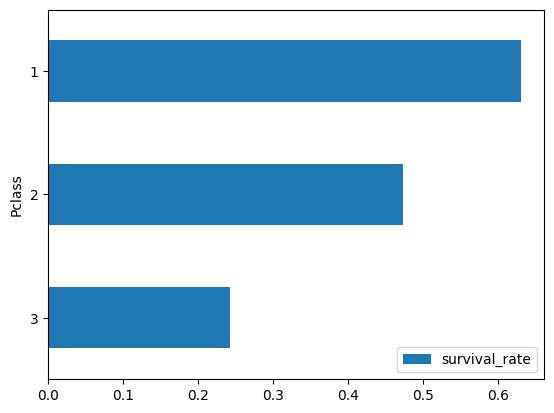

In [ ]:
(titanic_ddf
 .groupBy("Pclass")
 .agg({"Survived":"mean"})
 .withColumnRenamed('avg(survived)',"survival_rate")
).toPandas().sort_values(by='survival_rate').set_index('Pclass').plot.barh()

In [ ]:
type((titanic_ddf
 .groupBy("Pclass")
 .agg({"Survived":"mean"})
 .withColumnRenamed('avg(survived)',"survival_rate")
).toPandas())

pandas.core.frame.DataFrame

**Machine Learning with Spark**

Variable to be predicted ($y$): `Survived`

Variables to be used as predictors:
* Pclass (number, no missing): use it as it is
* Sex (String, no missing value): use it and recode as a number
* Age (number, missing values): fill missing before using it
* SibSp (number, no missing) use it as it is
* Parch (number, no missing) use it as it is
* Fare (number, no missing) use it maybe
* Embarked (string, 2 missings): fill missing and encode them

In [ ]:
#select passengers where age is null
#1st method
titanic_ddf.filter("age is null").show()

+-----------+--------+------+--------------------+------+----+-----+-----+---------------+--------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|         Ticket|    Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+---------------+--------+-----+--------+
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|         330877|  8.4583| NULL|       Q|
|         18|       1|     2|Williams, Mr. Cha...|  male|NULL|    0|    0|         244373|    13.0| NULL|       S|
|         20|       1|     3|Masselmani, Mrs. ...|female|NULL|    0|    0|           2649|   7.225| NULL|       C|
|         27|       0|     3|Emir, Mr. Farred ...|  male|NULL|    0|    0|           2631|   7.225| NULL|       C|
|         29|       1|     3|"O'Dwyer, Miss. E...|female|NULL|    0|    0|         330959|  7.8792| NULL|       Q|
|         30|       0|     3| Todoroff, Mr. Lalio|  male|NULL|    0|    0|      

In [ ]:
#2nd method
titanic_ddf.where('age is null').show()

+-----------+--------+------+--------------------+------+----+-----+-----+---------------+--------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|         Ticket|    Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+---------------+--------+-----+--------+
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|         330877|  8.4583| NULL|       Q|
|         18|       1|     2|Williams, Mr. Cha...|  male|NULL|    0|    0|         244373|    13.0| NULL|       S|
|         20|       1|     3|Masselmani, Mrs. ...|female|NULL|    0|    0|           2649|   7.225| NULL|       C|
|         27|       0|     3|Emir, Mr. Farred ...|  male|NULL|    0|    0|           2631|   7.225| NULL|       C|
|         29|       1|     3|"O'Dwyer, Miss. E...|female|NULL|    0|    0|         330959|  7.8792| NULL|       Q|
|         30|       0|     3| Todoroff, Mr. Lalio|  male|NULL|    0|    0|      

In [ ]:
titanic_ddf.describe().show()

+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|summary|      PassengerId|           Survived|            Pclass|                Name|   Sex|               Age|             SibSp|              Parch|            Ticket|             Fare|Cabin|Embarked|
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|  count|              891|                891|               891|                 891|   891|               714|               891|                891|               891|              891|  204|     889|
|   mean|            446.0| 0.3838383838383838| 2.308641975308642|                NULL|  NULL| 29.69911764705882|0.5230078563411896|0.38159371492704824|260318.54916792738| 32.20420

# Fill missing values in age column

In [ ]:
titanic_age_median = titanic_ddf.agg({"Age":"median"}).toPandas().iloc[0][0]

titanic_ddf.fillna({'Age':titanic_age_median}).show(8)


+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|28.0|    0|    0|      

In [ ]:
titanic_ddf.where("Embarked is null").show()

+-----------+--------+------+--------------------+------+----+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+------+----+-----+--------+
|         62|       1|     1| Icard, Miss. Amelie|female|38.0|    0|    0|113572|80.0|  B28|    NULL|
|        830|       1|     1|Stone, Mrs. Georg...|female|62.0|    0|    0|113572|80.0|  B28|    NULL|
+-----------+--------+------+--------------------+------+----+-----+-----+------+----+-----+--------+



In [ ]:
from pyspark.ml.feature import StringIndexer,OneHotEncoder, Imputer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.pipeline import Pipeline

#convert sex to numbers, 0 for the most present sex (male) and 1 for less
op_sex = StringIndexer(inputCol="Sex",outputCol="nsex")

#encode embarked values (S,C,Q) with 0,1,2 and 0for the most present class, in this case S
op_embarked = StringIndexer(inputCol="Embarked",outputCol="nembarked",handleInvalid="skip") #do not block on NA when encoutered

#fill na values of the age column by the median
op_fill_age = Imputer(inputCol="Age",outputCol="fage",strategy="median")

#fill na values of the embarked column with the highest modality value
op_fill_embarked = Imputer(inputCol="nembarked",outputCol="fembarked",strategy="mode")

#encode the embarked values in a one hot way
op_ohe_embaked = OneHotEncoder(inputCol="fembarked",outputCol="oheembarked",dropLast=True) #to have n-1 associated columns

#A feature transformer that merges multiple columns into a vector column.
#in spark, when dealing with multiple columns database we need to convert them into a vector column
#spark only works with vectorColumns

op_features = VectorAssembler(inputCols=['Pclass',"nsex","fage","SibSp","Parch","Fare","oheembarked"],outputCol="features")

#now put all the above preprocessing into a pipeline
pipeline_features = Pipeline(stages=[op_sex,op_embarked,op_fill_age,op_fill_embarked,op_ohe_embaked,op_features])

#TRAINING ALGORITHMS

In [ ]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier

lr = LogisticRegression(labelCol="Survived")

rf = RandomForestClassifier(labelCol="Survived")

gbt = GBTClassifier(labelCol='Survived')

pipeline_lr = Pipeline(stages=[pipeline_features,lr])
pipeline_rf = Pipeline(stages=[pipeline_features,rf])
pipeline_gbt = Pipeline(stages=[pipeline_features,gbt])

In [ ]:
fitted_lr = pipeline_lr.fit(titanic_ddf)

In [ ]:
#how to access the model
#it's the last stage of our pipeline( logique.pdf haha)
fitted_lr.stages[-1]


LogisticRegressionModel: uid=LogisticRegression_43f05a9499a9, numClasses=2, numFeatures=8

In [ ]:
fitted_lr.transform(titanic_ddf).show(5,truncate=False)

+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+----+---------+----+---------+-------------+--------------------------------------+----------------------------------------+----------------------------------------+----------+
|PassengerId|Survived|Pclass|Name                                               |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|nsex|nembarked|fage|fembarked|oheembarked  |features                              |rawPrediction                           |probability                             |prediction|
+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+----+---------+----+---------+-------------+--------------------------------------+----------------------------------------+----------------------------------------+----------+
|1          |0       |3     |Braun

In [ ]:
fitted_rf = pipeline_rf.fit(titanic_ddf)
fitted_rf.transform(titanic_ddf).show(5,truncate=False)

+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+----+---------+----+---------+-------------+--------------------------------------+--------------------------------------+----------------------------------------+----------+
|PassengerId|Survived|Pclass|Name                                               |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|nsex|nembarked|fage|fembarked|oheembarked  |features                              |rawPrediction                         |probability                             |prediction|
+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+----+---------+----+---------+-------------+--------------------------------------+--------------------------------------+----------------------------------------+----------+
|1          |0       |3     |Braund, Mr.

Splitting the dataset into train & Test

In [ ]:
train_ddf, test_ddf = titanic_ddf.randomSplit([2.,1.]) #equivalent to [0.66,0.33]


Evaluate the algorithms

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
#create the evaluator object

evaluator = BinaryClassificationEvaluator(labelCol="Survived")
#train the model again
fitted_lr = pipeline_lr.fit(train_ddf)

#compute the AUC score
evaluator.evaluate(fitted_lr.transform(test_ddf))


0.8539068666140489

In [ ]:
#train the model again
fitted_gbt = pipeline_gbt.fit(train_ddf)
print(f"AUC ROC GBT:{evaluator.evaluate(fitted_gbt.transform(test_ddf))}")

fitted_rf = pipeline_rf.fit(train_ddf)
print(f"AUC ROC RF:{evaluator.evaluate(fitted_rf.transform(test_ddf))}")


AUC ROC GBT:0.8705077611154953
AUC ROC RF:0.8645882662457248


In [ ]:
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.tuning import ParamGridBuilder

#build the grid
grid_lr = ParamGridBuilder().addGrid(lr.maxIter,[10,50,100]).build()

cv_lr = CrossValidator(estimator=pipeline_lr,estimatorParamMaps=grid_lr,evaluator=evaluator,numFolds=10)

optimized_lr = cv_lr.fit(titanic_ddf)


In [ ]:
optimized_lr.avgMetrics

[0.8511681723300318, 0.8510823175397293, 0.8510823175397293]

In [ ]:
optimized_lr.bestModel.stages[-1]

LogisticRegressionModel: uid=LogisticRegression_43f05a9499a9, numClasses=2, numFeatures=8

In [ ]:
grid_rf = ParamGridBuilder().addGrid(rf.numTrees,[50,100,200]).addGrid(rf.maxDepth,[3,5,8]).build()

cv_rf = CrossValidator(estimator=pipeline_rf,estimatorParamMaps=grid_rf,evaluator=evaluator,numFolds=10)

#start training all the models for each parameters combinations defined in the grid
optimized_rf = cv_rf.fit(titanic_ddf)

Do the same for GBT

In [ ]:
grid_gbt = ParamGridBuilder().addGrid(gbt.maxDepth,[3,5,8]).build()

cv_gbt = CrossValidator(estimator=pipeline_gbt,estimatorParamMaps=grid_gbt,evaluator=evaluator,numFolds=5)

#start training all the models for each parameters combinations defined in the grid
optimized_gbt = cv_gbt.fit(titanic_ddf)

In [ ]:
 #finding the best model


In [ ]:
best_accuracy = 0
best_pipeline = None
for pipeline in [optimized_lr,optimized_gbt,optimized_rf]:
  if max_avg := max(pipeline.avgMetrics) > best_accuracy: #values operators (:= )
    best_pipeline = pipeline
    best_accuracy = max_avg
print(f"The best model overall is {best_pipeline} with the parameters : {best_pipeline.extractParamMap} and the accuracy :{best_accuracy}")

The best model overall is CrossValidatorModel_84ddd6374c33 with the parameters : <bound method Params.extractParamMap of CrossValidatorModel_84ddd6374c33> and the accuracy :True


Making the model persistent

In [ ]:
best_pipeline.save('best_titanic_survived_sparkml')

In [ ]:
#loading the saved model
from pyspark.ml.tuning import CrossValidatorModel
reload_best_pipeline = CrossValidatorModel.load('best_titanic_survived_sparkml')